In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
dataset = pd.read_csv('insurance.csv')

Berikut fitur yang bisa dipilih untuk model prediktif:

1. age: Fitur ini merupakan fitur numerik yang penting karena usia sering kali mempengaruhi biaya asuransi. Semakin tua seseorang, biasanya premi asuransi akan semakin mahal.

2. sex: Meskipun fitur ini adalah fitur kategori (binary: pria/wanita), jenis kelamin bisa mempengaruhi biaya asuransi. Fiutr ini perlu di-encode.

3. bmi: Indeks massa tubuh merupakan fitur numerik yang relevan karena kondisi kesehatan seseorang, seperti obesitas, bisa berdampak pada biaya asuransi.

4. children: Jumlah anak merupakan fitur numerik yang bisa berpengaruh pada pengeluaran dan risiko, sehingga relevan untuk dimasukkan ke model.

5. smoker: Ini adalah fitur kategori biner yang sangat penting, karena perokok biasanya dikenakan premi lebih tinggi. Fitur ini perlu di-encode.

6. region: Fitur kategori yang bisa menunjukkan wilayah geografis. Biaya asuransi mungkin berbeda di berbagai wilayah, sehingga perlu di-encode sebagai variabel kategori.

In [55]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['region'] = le.fit_transform(dataset['region'])

In [58]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [59]:
# Fitur (x) target (y)
x = dataset.drop('charges', axis=1) # Semua kolom kecuali charges
y = dataset['charges'] # Kolom target

# Membagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print("Data Latih (X_train):\n", x_train)
print("\nData Uji (X_test):\n", x_test)

Data Latih (X_train):
       age  sex     bmi  children  smoker  region
1306   29    0  21.850         0       1       0
124    47    0  33.915         3       0       1
588    61    0  35.910         0       0       0
1127   35    0  35.860         2       0       2
201    48    0  32.230         1       0       2
...   ...  ...     ...       ...     ...     ...
802    21    1  22.300         1       0       3
53     36    1  34.430         0       1       2
350    57    0  23.180         0       0       1
79     41    0  32.965         0       0       1
792    22    0  23.180         0       0       0

[1070 rows x 6 columns]

Data Uji (X_test):
       age  sex     bmi  children  smoker  region
12     23    1  34.400         0       0       3
306    28    0  27.500         2       0       3
318    44    0  27.645         0       0       1
815    20    0  31.460         0       0       2
157    18    1  25.175         0       1       0
...   ...  ...     ...       ...     ...     ...


In [60]:
# feature scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)


# Reshape y_train untuk fit ke scaler_y (karena scaler_y butuh array 2D)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [61]:
from sklearn.svm import SVR

# Membuat model SVR
svr_model = SVR(kernel='rbf')

# Melatih model dengan data latih yang telah di scale
svr_model.fit(x_train_scaled, y_train_scaled)

# Memprediksi
y_pred_svr_scaled = svr_model.predict(x_test_scaled)

# Mengembalikan hasil prediksi ke skala aslinya
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

# Menghitung MAE, MSE, dan R-squared pada skala asli
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
r_squared = r2_score(y_test, y_pred_svr)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 2505.0484077853807
Mean Squared Error (MSE): 18732259.902009036
R-squared: 0.880540213141699


1. MAE mengukur rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi. Dalam hal ini, rata-rata kesalahan prediksi model adalah sekitar 2505, yang berarti setiap prediksi model, rata-rata meleset sekitar 2505 unit dari nilai sebenarnya.
2. MSE mengukur rata-rata kuadrat dari selisih antara nilai aktual dan nilai prediksi. MSE yang tinggi menunjukkan bahwa model membuat beberapa kesalahan prediksi yang cukup besar. Nilai ini membantu menunjukkan bahwa meskipun rata-rata kesalahan mungkin kecil (dalam MAE), ada kemungkinan beberapa outlier yang memiliki kesalahan besar.
3. R-squared (koefisien determinasi) mengukur seberapa baik model menjelaskan variabilitas data target. R-squared sebesar 0.88 berarti 88% dari variasi dalam data target dapat dijelaskan oleh model.

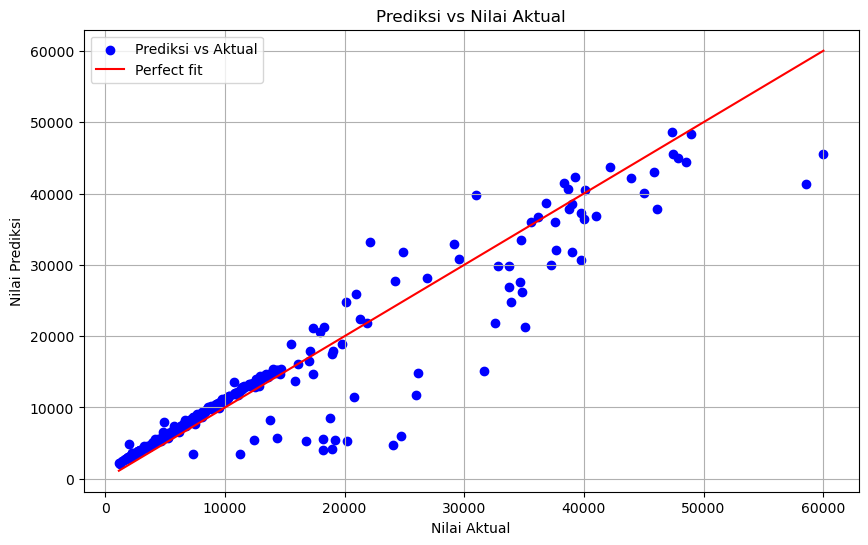

In [62]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))

# Plot nilai asli vs prediksi
plt.scatter(y_test, y_pred_svr, color='blue', label='Prediksi vs Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect fit')  # Garis sempurna

plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()

1. Titik biru mewakili prediksi model versus nilai aktual. Jika model melakukan prediksi yang akurat, titik-titik ini akan berdekatan atau berada di sekitar garis merah (garis referensi sempurna).
2. Garis merah mewakili prediksi sempurna. Jika semua titik biru tepat di garis merah, artinya model menghasilkan prediksi yang sempurna.
3. Semakin dekat titik-titik ke garis merah, semakin baik model dalam memprediksi target.